In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Downloads\\Classification_train\\Classification_train.csv")
# print(data)
# print(data.columns)
data = data.to_numpy()    #converting the dataset to numpy

<H3>STEPS</H3>
1)Understanding the training dataset and validation dataset
<br>
2)Feature scaling
<br>
3)Defining necessary functions
<br>
4)accuracy
<br>
5)Working on Test-dataset

In [3]:
np.random.shuffle(data)
X = data[:, range(1,785)]   #features
Y = data[: , 0]            #targets

In [4]:
X_train = X[:20000 , :]
Y_train = Y[:20000]
X_test = X[20000: , :]
Y_test = Y[20000:]


In [5]:
print(X_train[:2, :])
X_train.shape


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(20000, 784)

In [6]:
print(Y_train)
print(Y_train.shape)
print(Y_train.dtype)

[8 0 5 ... 2 6 2]
(20000,)
int64


In [7]:
print(X_train[0].max())
print(X_train[0].min())

255
0


<h3>Feature Scaling</h3>
<h4>Mean Normalization</h5>

In [8]:
def mean_norm(X):
    mean_values = np.mean(X, axis=0)
    denominator_range = np.ptp(X, axis=0)

    # To avoid division by zero
    output = np.zeros(X.shape, dtype='float')       #To ensure that the output array is of type float
    non_zero_features = (denominator_range != 0)    # Appling normalization for non-zero range features
    output[:, non_zero_features] = (X[:, non_zero_features] - mean_values[non_zero_features]) / denominator_range[non_zero_features]

    # Setting the mean value for features with zero range
    output[:, ~non_zero_features] = mean_values[~non_zero_features]

    return output

In [9]:
X_train = mean_norm(X_train)    #final X that is to be used for further computations
print(X_train)
X_test = mean_norm(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(X_train[0].max())
print(X_train[0].min())

0.9847688235294118
-0.3337664705882353


In [11]:
print(X_test[0].max())
print(X_test[0].min())

0.976246274509804
-0.3386898039215686


<function matplotlib.pyplot.show(close=None, block=None)>

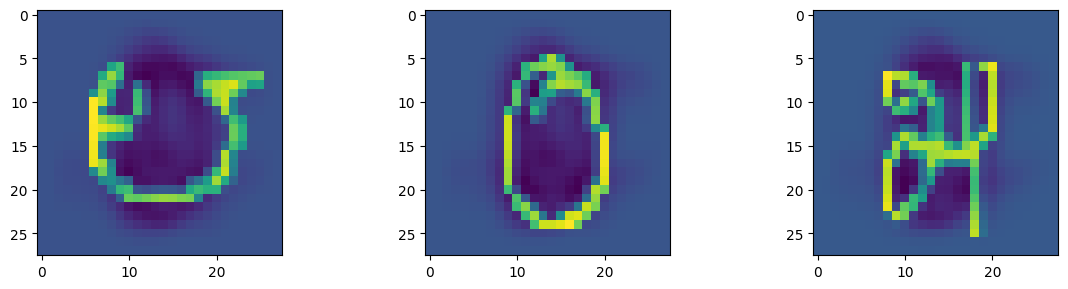

In [12]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_train[i].reshape(28,28))
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

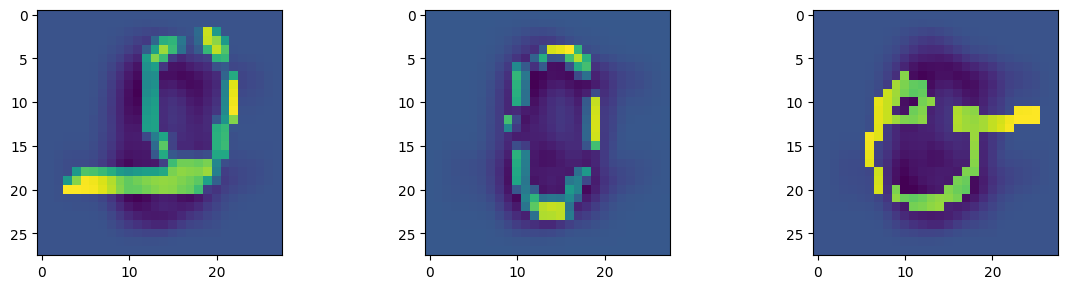

In [13]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_test[i].reshape(28,28))
plt.tight_layout()
plt.show

In [14]:
t = np.unique(Y_train)
print(t)

[0 1 2 3 4 5 6 7 8 9]


In [15]:
classes = t.shape[0]
print(classes)

10


In [18]:
def KNN(X_train , X_test, Y_train,K):
  m,n  = X_test.shape
  Y_predict = np.zeros(m)
  for i in range(m):
      distances = np.sum((np.square(X_train - X_test[i, :])), axis=1)
      sorted_dist_indices = np.argsort(distances)
      labels = Y_train[sorted_dist_indices[:K]]
      Y_predict[i] = np.bincount(labels).argmax()
  return Y_predict

In [20]:
for k in [3, 5, 7, 9, 11]:
    Y_predict = KNN(X_train, X_test, Y_train, K=k)
    acc = np.mean(Y_predict == Y_test)
    print("Accuracy for k =", k, ":", acc)



Accuracy for k = 3 : 0.9796
Accuracy for k = 5 : 0.9784
Accuracy for k = 7 : 0.9762
Accuracy for k = 9 : 0.9753
Accuracy for k = 11 : 0.9742


<h5>OPTIMAL "K" VALUE = "3"</h5>

<h3>Testing the model on the Test dataset</h3>

In [21]:
test_data = pd.read_csv("Downloads\\Classification_test\\Classification_test.csv")
# print(test_data.columns)
test_data = test_data.to_numpy()

In [22]:
test_X = np.delete(test_data , 0 , axis =1)
ID = test_data[:,0]

In [23]:
test_X.shape

(10000, 784)

In [24]:
test_X_final = mean_norm(test_X)

<function matplotlib.pyplot.show(close=None, block=None)>

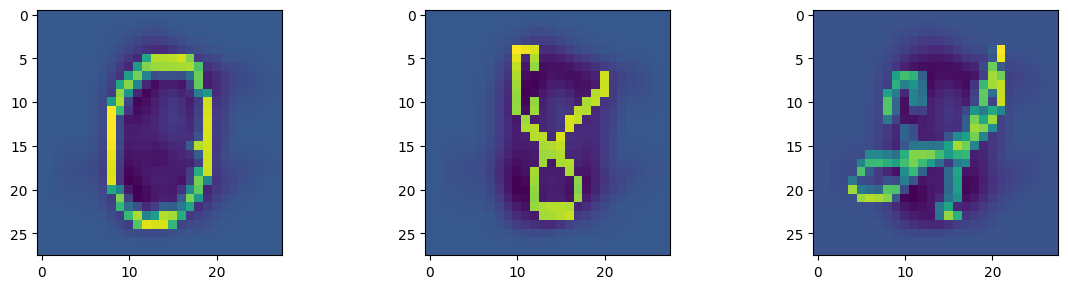

In [25]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(test_X_final[i].reshape(28,28))
plt.tight_layout()
plt.show

In [27]:
test_Y_predict = KNN(X_train , test_X_final , Y_train , K=3)

In [29]:
print(test_Y_predict)
test_Y_predict.shape

[0. 4. 5. ... 0. 8. 4.]


(10000,)

In [30]:
predictions = np.c_[ID,test_Y_predict]
df = pd.DataFrame(predictions , columns = ['IDs','Predicted-Labels'])
df.to_csv("Downloads\\CL-Project\\KNN_Predictions.csv", index=False)